In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
data=pd.read_csv("C:/Users/muham/Veriler/basit_dogrusal_regresyon.csv")

In [8]:
data.head() #veriyi incelediğimizde tecrübe ve maaş arasında bir ilişki olduğunu görüyoruz

,Tecrübe,Maaş
0,1.1,3934
1,1.3,4620
2,1.5,3773
3,2.0,4352
4,2.2,3989


In [9]:
data.tail()

,Tecrübe,Maaş
25,9.0,10558
26,9.5,11696
27,9.6,11263
28,10.3,12239
29,10.5,12187


In [10]:
x=data.iloc[:,0].values.reshape(-1,1) #Buradaki verilerin numpy verisinde dönüşmesi gerekiyor o yüzden reshape metodu ile bu
                               #işlemi yapıyoruz
y=data.iloc[:,1] #Veri tek boyutlu bir frame olması hasebiyle bizde bunun futurelarına ayırarak
                                      #analizi kolaylaştırıyoruz.

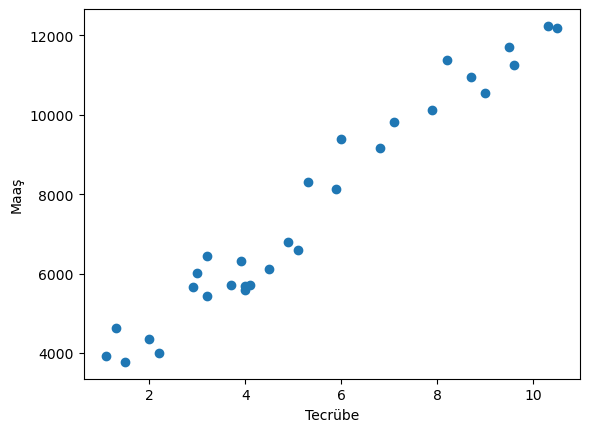

In [11]:
plt.scatter(x,y)
plt.xlabel('Tecrübe')
plt.ylabel('Maaş')
plt.show()

In [12]:
#Şimdi tahmin algoritmasını oluşturmaya başlıyoruz çünkü arada verılmeyen yılları tahmin edeceğiz

In [13]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.8,random_state=42)

In [14]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [15]:
lr.fit(xtrain,ytrain) #iyi tahmin yapabilmek için veriyi eğitiyoruz.

LinearRegression()

In [16]:
print(type(lr))

<class 'sklearn.linear_model._base.LinearRegression'>


In [17]:
yhead=lr.predict(xtest) #Sonuç: yhead, xtest için tahmin edilen maaş değerlerini içerir.
#xtestteki yıl verileri sayesinde y test için maaş bilgilerini taminliyor

In [18]:
yhead

array([12387.7782167 ,  7428.08465011, 10910.42268623,  7850.18623025,
        5634.15293454,  6161.77990971, 13126.45598194, 11438.0496614 ,
        6478.35609481,  3418.11963883,  4578.8989842 ,  7639.13544018,
        5317.57674944,  6583.88148984,  6478.35609481, 10593.84650113,
        3629.17042889,  3840.22121896, 11754.6258465 ,  4367.84819413,
        9749.64334086, 12282.25282167,  8483.33860045, 13337.50677201])

In [19]:
lr.predict([[30]]) #2 sene çalışan birisinin alması gereken maaş modele göre

array([33914.95880361])

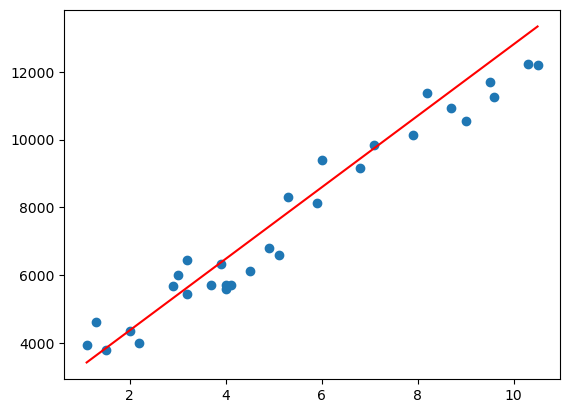

In [20]:
plt.scatter(x,y)
plt.plot(x,lr.predict(x),color='red')

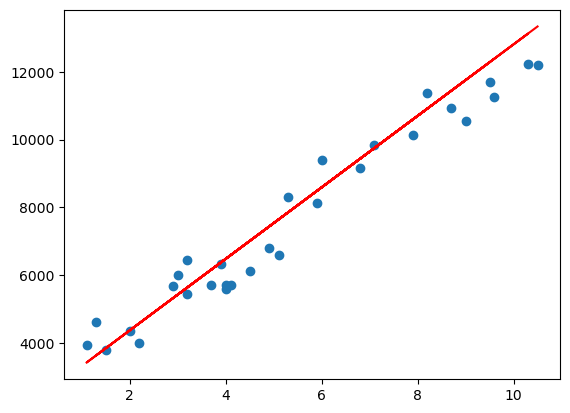

In [21]:
plt.scatter(x,y)
plt.plot(xtest,lr.predict(xtest),color='red')

In [22]:
from sklearn.metrics import r2_score
r2_score(ytest,yhead)

0.9381989388720999